Imports etc.


In [1]:
import os
import natsort
import torch 
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.io import read_video
from PIL import Image

Read key-points

In [2]:
path = "/home/yannik/Videos/vssil/subj1_scenario1_01_annotated/images"

T = len(os.listdir(path))

lemon_kpt_tensor = torch.empty((T, 1, 2))
orange_kpt_tensor = torch.empty((T, 1, 2))
box_kpt_tensor = torch.empty((T, 1, 2))
pear_kpt_tensor = torch.empty((T, 1, 2))
eef_kpt_tensor = torch.empty((T, 5, 2))

import xml.etree.ElementTree as ET
tree = ET.parse("/home/yannik/Videos/vssil/subj1_scenario1_01_annotated/annotations.xml")
root = tree.getroot()

for elem in root:
    
    if not (elem.attrib == {}):
        
        lab = elem.attrib['label']

        for t, subelem in enumerate(elem):

            pts = subelem.attrib['points'].split(',')

            if lab == 'kpts_lemon':
                lemon_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                lemon_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_orange':
                orange_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                orange_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_box':
                box_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                box_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_pear':
                pear_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                pear_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_eef':
                
                pts = subelem.attrib['points'].split(';')
                
                for p in range(len(pts)):
                    
                    pt = pts[p].split(',')
                
                    eef_kpt_tensor[t, p, 0] = int(float(pt[0]))
                    eef_kpt_tensor[t, p, 1] = int(float(pt[1]))


Read images and plot with key-points

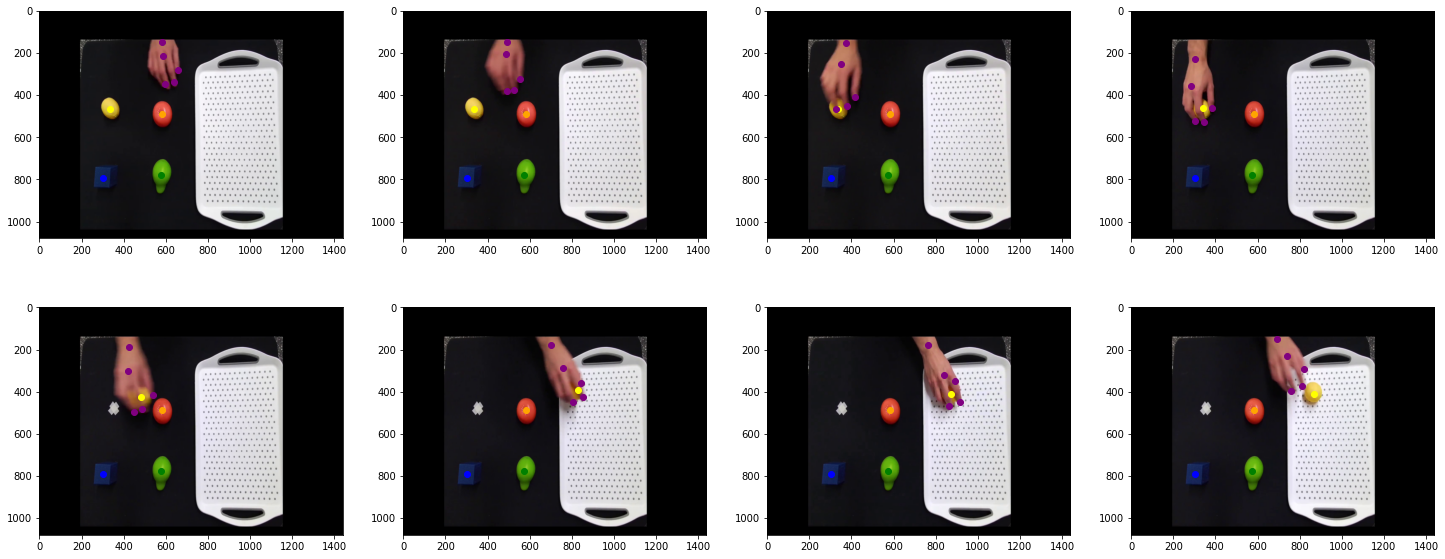

In [3]:
t = [0, 5, 10, 20, 30, 40, 50, 59]

fig, ax = plt.subplots(max(len(t)//4, 1), 4, figsize=(25, 10))

subj1_img_shape = None

for _t in range(len(t)):
    
    img_path = os.path.join(path, natsort.natsorted(os.listdir(path))[t[_t]])
    
    img = Image.open(img_path)
    
    img = transforms.ToTensor()(img)
    
    if subj1_img_shape is None:
        subj1_img_shape = img.shape
    
    ax[_t//4][_t%4].imshow(img.permute(1, 2, 0))
    ax[_t//4][_t%4].scatter(lemon_kpt_tensor[t[_t], :, 0], lemon_kpt_tensor[t[_t], :, 1], c='yellow')
    ax[_t//4][_t%4].scatter(orange_kpt_tensor[t[_t], :, 0], orange_kpt_tensor[t[_t], :, 1], c='orange')
    ax[_t//4][_t%4].scatter(box_kpt_tensor[t[_t], :, 0], box_kpt_tensor[t[_t], :, 1], c='blue')
    ax[_t//4][_t%4].scatter(pear_kpt_tensor[t[_t], :, 0], pear_kpt_tensor[t[_t], :, 1], c='green')
    ax[_t//4][_t%4].scatter(eef_kpt_tensor[t[_t], :, 0], eef_kpt_tensor[t[_t], :, 1], c='purple')
plt.show()

Read tiago key-points

In [4]:
path = "/home/yannik/Videos/vssil/tiago_scenario1_01_annotated/images"

T = len(os.listdir(path))

lemon_kpt_tensor = torch.empty((T, 1, 2))
orange_kpt_tensor = torch.empty((T, 1, 2))
box_kpt_tensor = torch.empty((T, 1, 2))
pear_kpt_tensor = torch.empty((T, 1, 2))
eef_kpt_tensor = torch.empty((T, 2, 2))

import xml.etree.ElementTree as ET
tree = ET.parse("/home/yannik/Videos/vssil/tiago_scenario1_01_annotated/annotations.xml")
root = tree.getroot()

for elem in root:
    
    if not (elem.attrib == {}):
        
        lab = elem.attrib['label']

        for t, subelem in enumerate(elem):

            pts = subelem.attrib['points'].split(',')

            if lab == 'kpts_lemon':
                lemon_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                lemon_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_orange':
                orange_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                orange_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_box':
                box_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                box_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_pear':
                pear_kpt_tensor[t, 0, 0] = int(float(pts[0]))
                pear_kpt_tensor[t, 0, 1] = int(float(pts[1]))
            elif lab == 'kpts_eef':
                
                pts = subelem.attrib['points'].split(';')
                
                for p in range(len(pts)):
                    
                    pt = pts[p].split(',')
                
                    eef_kpt_tensor[t, p, 0] = int(float(pt[0]))
                    eef_kpt_tensor[t, p, 1] = int(float(pt[1]))


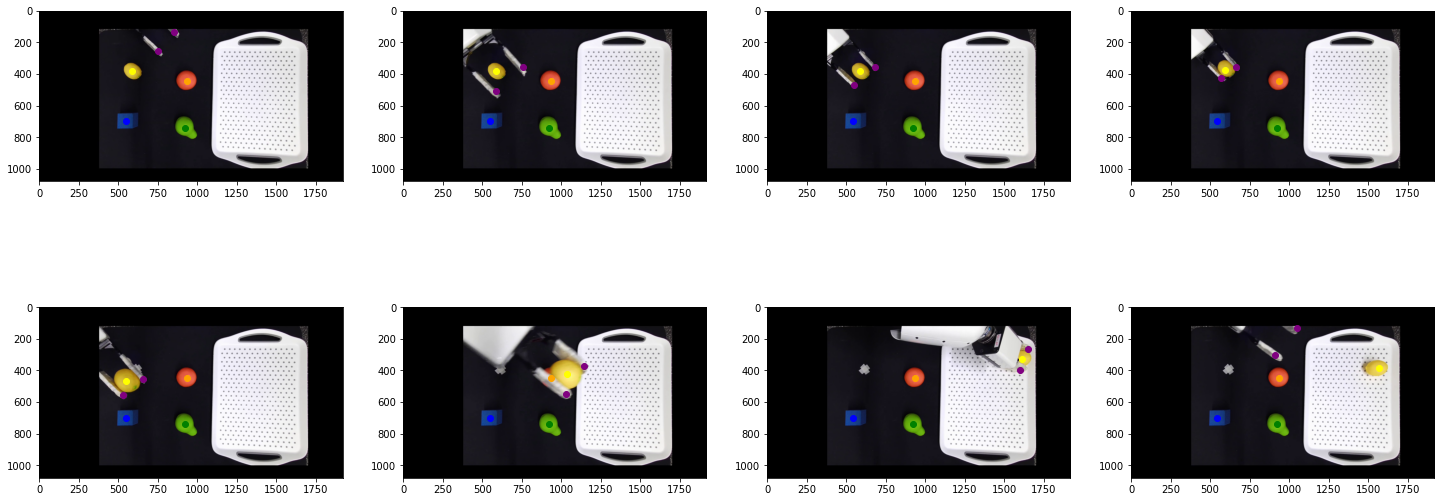

In [15]:
t = [0, 150, 200, 300, 450, 475, 600, 950]

fig, ax = plt.subplots(max(len(t)//4, 1), 4, figsize=(25, 10))

tiago_img_shape = None
tiago_img_sequence = None
tiago_lemon_img_coordinates = None
tiago_eef_img_coordinates = None

for _t in range(len(t)):
    
    img_path = os.path.join(path, natsort.natsorted(os.listdir(path))[t[_t]])
    
    img = Image.open(img_path)
    
    img = transforms.ToTensor()(img)
    
    if tiago_img_shape is None:
        tiago_img_shape = img.shape
    
    tiago_img_sequence = img.unsqueeze(0) if tiago_img_sequence is None \
        else torch.cat([tiago_img_sequence, img.unsqueeze(0)], dim=0)
    
    ax[_t//4][_t%4].imshow(img.permute(1, 2, 0))
    ax[_t//4][_t%4].scatter(lemon_kpt_tensor[t[_t], :, 0], lemon_kpt_tensor[t[_t], :, 1], c='yellow')
    
    tiago_lemon_img_coordinates = lemon_kpt_tensor[t[_t], ...].unsqueeze(0) if tiago_lemon_img_coordinates is None \
        else torch.cat([tiago_lemon_img_coordinates, lemon_kpt_tensor[t[_t], ...].unsqueeze(0)], dim=0)
    
    ax[_t//4][_t%4].scatter(orange_kpt_tensor[t[_t], :, 0], orange_kpt_tensor[t[_t], :, 1], c='orange')
    ax[_t//4][_t%4].scatter(box_kpt_tensor[t[_t], :, 0], box_kpt_tensor[t[_t], :, 1], c='blue')
    ax[_t//4][_t%4].scatter(pear_kpt_tensor[t[_t], :, 0], pear_kpt_tensor[t[_t], :, 1], c='green')
    ax[_t//4][_t%4].scatter(eef_kpt_tensor[t[_t], :, 0], eef_kpt_tensor[t[_t], :, 1], c='purple')
    
    tiago_eef_img_coordinates = eef_kpt_tensor[t[_t], ...].unsqueeze(0) if tiago_eef_img_coordinates is None \
        else torch.cat([tiago_eef_img_coordinates, eef_kpt_tensor[t[_t], ...].unsqueeze(0)], dim=0)
    
plt.show()

Extract patches

In [11]:
from src.utils.kpt_utils import img_coordinates_2_kpts, kpts_2_img_coordinates, get_image_patches

torch.Size([8, 3, 1080, 1920])
torch.Size([8, 1, 2])
torch.Size([8, 2, 2])
torch.Size([1, 8, 1, 3, 128, 128])
torch.Size([1, 8, 2, 3, 128, 128])


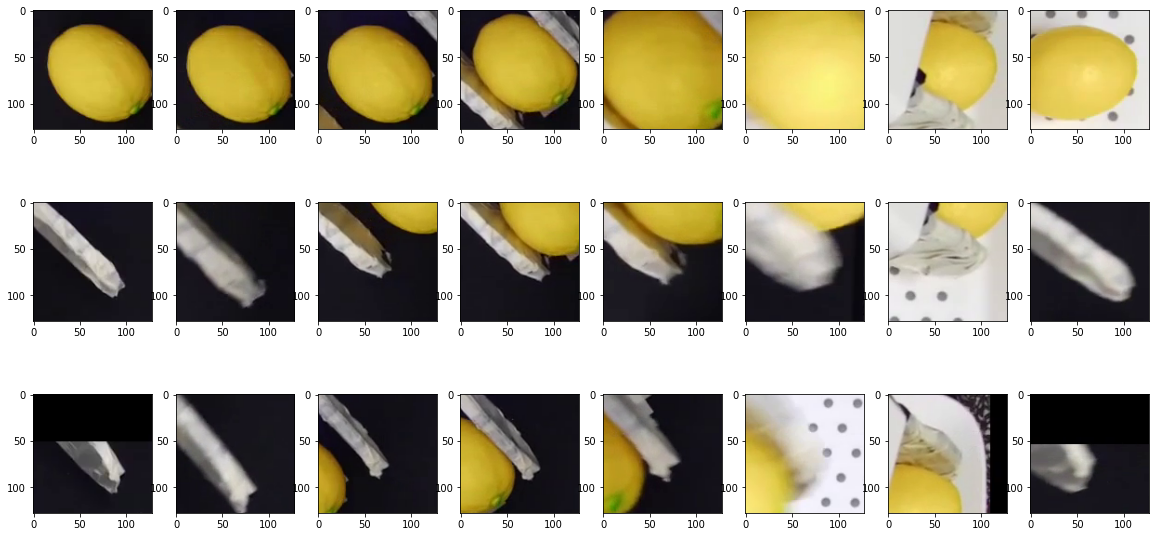

In [20]:
patch_size = (128, 128)

tiago_lemon_kpt_sequence = img_coordinates_2_kpts(tiago_lemon_img_coordinates, tiago_img_shape[1:])
tiago_eef_kpt_sequence = img_coordinates_2_kpts(tiago_eef_img_coordinates, tiago_img_shape[1:])

print(tiago_img_sequence.shape)  # (T, C, H, W)
print(tiago_lemon_kpt_sequence.shape)  # (T, 1, 2)
print(tiago_eef_kpt_sequence.shape)  # (T, 2, 2)

tiago_lemon_patches = get_image_patches(tiago_img_sequence.unsqueeze(0),
                                        tiago_lemon_kpt_sequence.unsqueeze(0),
                                        patch_size)

tiago_eef_patches = get_image_patches(tiago_img_sequence.unsqueeze(0),
                                     tiago_eef_kpt_sequence.unsqueeze(0),
                                     patch_size)

print(tiago_lemon_patches.shape)  # (N, T, 1, C, H', W')
print(tiago_eef_patches.shape)  # (N, T, 2, C, H', W')

fig, ax = plt.subplots(3, 8, figsize=(20, 10))
for t in range(8):
    ax[0, t].imshow(tiago_lemon_patches[0, t, 0, ...].permute(1, 2, 0))
    ax[1, t].imshow(tiago_eef_patches[0, t, 0, ...].permute(1, 2, 0))
    ax[2, t].imshow(tiago_eef_patches[0, t, 1, ...].permute(1, 2, 0))
plt.show()